## <center>Scrits to generate all figures in r2d4 manuscript</center>


In [2]:
%matplotlib inline
import scipy
import pdb

from pylab import *
import scipy.cluster.hierarchy as sch
import numpy as np

import fnmatch
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import fcluster
from matplotlib.colors import rgb2hex, colorConverter
from scipy.spatial import distance
from scipy import signal, stats
import pdb
import matplotlib.ticker as ticker
import statsmodels.api as sm
from matplotlib import gridspec

#plotting specificis
%matplotlib inline
sns.set_context(context='paper', font_scale=2.0)
# this is the setting you want
sns.set_style("white", {'axes.linewidth':0.0000001, 'axes.edgecolor':'white'})

/Users/plb/anaconda/envs/pydev/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## Fig.B Representative reaction time plot showing improvement by block  

In [ ]:

data_out = pd.read_csv('/home/beukema2/Dropbox/r2d4/behavior/0491_allResp_r2d4_behavior_2015_Aug_14_1028_Day_12.csv')
lag_names = ['lag' + str(i) for i in  range(1,32)]
data_lags = pd.DataFrame(columns = lag_names)
sum_names = ['block', 'accuracy', 'rt_all', 'rt_cor', 'sdAcc', 'sdRT']
data_summary = pd.DataFrame(columns = (sum_names))
skip_index = 32
max_lags = 31
for i in np.unique(data_out[['block']]):
    #make a plot of the response times vs trial and plot by type save with subject's id.
    data_out['trial'] = np.array(range(1,len(data_out)+1))
    if i ==6:
        ax = sns.lmplot('trial', 'rt', hue = 'type', data=data_out, fit_reg=False)
        plt.grid(linestyle='dotted')
        plt.ylabel('Reaction Time (seconds)')
        plt.xlabel('Trial')
      

plt.savefig('/home/beukema2/Dropbox/r2d4/figures/Figure2/representative_rts.svg')

## Generate summary dataFrames for the reaction time plots in Figure 1 panel C and D

In [ ]:
#Create dataframes for z scored reactionTimes
def initialize_dfs():
    index = range(0,25)
    df_ = pd.DataFrame(index=index)
    df_.index.name = 'Day'
    df_ = df_.fillna(np.nan) # with 0s rather than NaNs

    dfrts = pd.DataFrame(index=index)
    dfrts = dfrts.fillna(np.nan) # with 0s rather than NaNs
    dfrts.index.name = 'Day'
    return df_, dfrts, dfrts.index.name, index 

def analyzeRts(subjectDir, group):
 
    #Find files matching
    summary_files = []
    for file in os.listdir(subjectDir):
        if fnmatch.fnmatch(file, '*summary_*Day_*.csv'):
            summary_files.append(os.path.realpath(os.path.join(subjectDir,file)))

    k=1
    for file in summary_files:
        df = pd.read_csv(file)
        base=os.path.basename(file)
        daytemp = os.path.splitext(base)[0]
        day = int(daytemp[48:])
        subject = subjectDir[-4:]
        dfrts.loc[day-1, subject] = (df['rt_all'][5] - df['rt_all'][6])/df['sdRT'][5]
        dfrts.to_csv('/home/beukema2/Dropbox/r2d4/figures/Figure2/' + group +'_reactionZscores.csv')                                                                                                                                        
   
df_, dfrts, dfrts.index.name, index  = initialize_dfs()   
for root, dirs, files in os.walk('/home/beukema2/Dropbox/r2d4/acfTest/sequence/'):
    analyzeRts(root, 'sequence')
df_, dfrts, dfrts.index.name, index  = initialize_dfs()   
for root, dirs, files in os.walk('/home/beukema2/Dropbox/r2d4/acfTest/control/'):
    analyzeRts(root, 'control')    

#Create dataframes raw reaction times

def initialize_dfs():
    index = range(0,25)
    df_ = pd.DataFrame(index=index)
    df_.index.name = 'Day'
    df_ = df_.fillna(np.nan) # with 0s rather than NaNs

    dfrts_block6 = pd.DataFrame(index=index)
    dfrts_block6 = dfrts_block6.fillna(np.nan) # with 0s rather than NaNs
    dfrts_block6.index.name = 'Day'
    dfrts_block7 = pd.DataFrame(index=index)
    dfrts_block7 = dfrts_block7.fillna(np.nan) # with 0s rather than NaNs
    dfrts_block7.index.name = 'Day'
    return df_, dfrts_block6, dfrts_block6.index.name, dfrts_block7, dfrts_block7.index.name, index 

def analyzeRts(subjectDir, group):
    #Find files matching
    summary_files = []
    for file in os.listdir(subjectDir):
        if fnmatch.fnmatch(file, '*summary_*Day_*.csv'):
            summary_files.append(os.path.realpath(os.path.join(subjectDir,file)))
    k=1
    for file in summary_files:
        df = pd.read_csv(file)
        base=os.path.basename(file)
        daytemp = os.path.splitext(base)[0]
        day = int(daytemp[48:])
        subject = subjectDir[-4:]
        dfrts_block6.loc[day-1, subject] =  df['rt_all'][6]
        dfrts_block7.loc[day-1, subject] =  df['rt_all'][5]
        
        dfrts_block6.to_csv('/home/beukema2/Dropbox/r2d4/figures/Figure2/' + group +'_reactionRaw_block6.csv')    
        dfrts_block7.to_csv('/home/beukema2/Dropbox/r2d4/figures/Figure2/' + group +'_reactionRaw_block7.csv')                                                                                                                                                                                                                
   
df_, dfrts_block6, dfrts_block6.index.name, dfrts_block7, dfrts_block7.index.name, index = initialize_dfs()   
for root, dirs, files in os.walk('/home/beukema2/Dropbox/r2d4/acfTest/sequence/'):
    analyzeRts(root, 'sequence')
df_, dfrts_block6, dfrts_block6.index.name, dfrts_block7, dfrts_block7.index.name, index = initialize_dfs()   
for root, dirs, files in os.walk('/home/beukema2/Dropbox/r2d4/acfTest/control/'):
    analyzeRts(root, 'control')    

## Fig 1.C: Raw Reaction Times

In [ ]:
df = pd.read_csv(os.path.expanduser('/home/beukema2/Dropbox/r2d4/figures/Figure2/sequence_reactionRaw_block6.csv'))
df = pd.melt(df, id_vars=["Day"], var_name="subject")
df['Group'] = np.array('sequence')
df2 = pd.read_csv(os.path.expanduser('/home/beukema2/Dropbox/r2d4/figures/Figure2/sequence_reactionRaw_block7.csv'))
df2 = pd.melt(df2, id_vars=["Day"], var_name="subject")
df2['Group'] = np.array('random')
bigdata=df.append(df2,ignore_index = True)
ax = sns.tsplot(data=bigdata, time="Day", unit="subject",ci=68, value="value", condition="Group",estimator=np.nanmean, interpolate = True, color=['#ef8d23', '#1726d3'])
ax.set(xlabel='Day', ylabel='RT')
ax.set(ylim=(0, .6))
ax.legend_.remove()
plt.grid(linestyle='dotted')
plt.savefig(os.path.expanduser('~/Dropbox/r2d4/figures/Figure2/sequence_raw.svg'))

## Fig 1.C: Raw Reaction Times

In [ ]:
df = pd.read_csv(os.path.expanduser('/home/beukema2/Dropbox/r2d4/figures/Figure2/control_reactionRaw_block6.csv'))
df = pd.melt(df, id_vars=["Day"], var_name="subject")
df['Group'] = np.array('sequence')
df2 = pd.read_csv(os.path.expanduser('/home/beukema2/Dropbox/r2d4/figures/Figure2/control_reactionRaw_block7.csv'))
df2 = pd.melt(df2, id_vars=["Day"], var_name="subject")
df2['Group'] = np.array('random')
bigdata=df.append(df2,ignore_index = True)
ax = sns.tsplot(data=bigdata, time="Day", unit="subject",ci=68, value="value", condition="Group",estimator=np.nanmean, interpolate = True, color=['#ef8d23', '#1726d3'])
ax.set(xlabel='Day', ylabel='RT')
ax.set(ylim=(0, .6))
ax.legend_.remove()
plt.grid(linestyle='dotted')
plt.savefig(os.path.expanduser('~/Dropbox/r2d4/figures/Figure2/control_raw.svg'))

## Fig 1.D: Reaction Time Improvement (z scores)


In [ ]:
df = pd.read_csv(os.path.expanduser('/home/beukema2/Dropbox/r2d4/figures/Figure2/sequence_reactionZscores.csv'))
df = pd.melt(df, id_vars=["Day"], var_name="subject")
df['Group'] = np.array('sequence')
df2 = pd.read_csv(os.path.expanduser('/home/beukema2/Dropbox/r2d4/figures/Figure2/control_reactionZscores.csv'))
df2 = pd.melt(df2, id_vars=["Day"], var_name="subject")
df2['Group'] = np.array('random')
bigdata=df.append(df2,ignore_index = True)
ax = sns.tsplot(data=bigdata, time="Day", unit="subject",ci=68, value="value", condition="Group",estimator=np.nanmean, interpolate = True, color=['#ef8d23', '#1726d3'])
ax.set(xlabel='Day', ylabel='RT Improvements (z-scores)')
ax.set(ylim=(-1, 6))
ax.legend_.remove()
plt.grid(linestyle='dotted')
plt.savefig(os.path.expanduser('~/Dropbox/r2d4/figures/Figure2/reactionTimes.svg'))

## Fig 1.E: Accuracy 

In [ ]:
def initialize_dfs():
    index = range(0,25)
    df_ = pd.DataFrame(index=index)
    df_.index.name = 'Day'
    df_ = df_.fillna(np.nan) # with 0s rather than NaNs

    dfrts = pd.DataFrame(index=index)
    dfrts = dfrts.fillna(np.nan) # with 0s rather than NaNs
    dfrts.index.name = 'Day'
    return dfrts, df_

def getAccuracy(subjectDir, group):
    #Find files matching
    summary_files = []
    for file in os.listdir(subjectDir):
        if fnmatch.fnmatch(file, '*summary_*Day_*.csv'):
            summary_files.append(os.path.realpath(os.path.join(subjectDir,file)))
    
    k=1
    for file in summary_files:
        df = pd.read_csv(file)
        base=os.path.basename(file)
        daytemp = os.path.splitext(base)[0]
        day = int(daytemp[48:])
        subject = subjectDir[-4:]
        dfrts.loc[day-1, subject] = df['accuracy'][6]
        dfrts.to_csv('/home/beukema2/Dropbox/r2d4/figures/Figure2/' + group +'accuracy.csv')  
        
dfrts, df_ = initialize_dfs()   
for root, dirs, files in os.walk('/home/beukema2/Dropbox/r2d4/acfTest/control/'):
    getAccuracy(root,  'control')
dfrts, df_ = initialize_dfs()      
for root, dirs, files in os.walk('/home/beukema2/Dropbox/r2d4/acfTest/sequence/'):
    getAccuracy(root, 'sequence')
    
df = pd.read_csv('/home/beukema2/Dropbox/r2d4/figures/Figure2/sequenceaccuracy.csv')
df = pd.melt(df, id_vars=["Day"], var_name="subject")
df['Group'] = np.array('sequence')
    
df2 = pd.read_csv('/home/beukema2/Dropbox/r2d4/figures/Figure2/controlaccuracy.csv')
df2 = pd.melt(df2, id_vars=["Day"], var_name="subject")
df2['Group'] = np.array('random')

bigdata=df.append(df2,ignore_index = True)
ax = sns.tsplot(data=bigdata, time="Day", unit="subject", value="value", condition="Group",estimator=np.nanmean, interpolate = True, color=['#ef8d23', '#1726d3'], err_style='ci_band', ci=68)
ax.set(xlabel='Day', ylabel='Accuracy (%)')

ax.set(ylim=(0.6,1))
ax.set(xlim=(-1,24))
ax.legend_.remove()
plt.grid(linestyle='dotted')
plt.savefig(os.path.expanduser('~/Dropbox/r2d4/figures/Figure2/accuracy.svg'))

## Figure 2 B True Distance Matrix </center>

In [ ]:
# sequence_stims = [4,5,3,4,2,5,3,2,4,5,4,5,2,4,5,3,2,3,5,3,4,2,3,2,3,5,4,2,4,2,3,5]
fig = plt.figure(figsize=(8,8))
trueDistances = np.array([[0, 0.0896, 0.0896, 0.3134],[0,0,0.3134,0.0896], [0,0,0,0.1045], [0,0,0,0]])
i_lower = np.tril_indices(4, -1)
trueDistances[i_lower] = trueDistances.T[i_lower]
trueD = sns.heatmap(trueDistances, annot=True, fmt='.3f', linewidths=.5, cmap = plt.cm.Blues, vmin=0, vmax=.5, square=True)
fig.savefig(os.path.expanduser('/home/beukema2/Dropbox/r2d4/figures/Figure3/trueDistanceMatrix.svg'))                                                                                                                                           


## Remake the summaries because in the initial version of the script, missing entries were being replaced by mean, but now we do the OLS with NaN 

In [ ]:
os.chdir(os.path.expanduser('~/Dropbox/r2d4/acfTest/'))

def remakeSummaries(subjectDir):
#build summary statistics file
    lag_names = ['lag' + str(i) for i in  range(1,32)]
    data_lags = pd.DataFrame(columns = lag_names)
    sum_names = ['block', 'accuracy', 'rt_all', 'rt_cor', 'sdAcc', 'sdRT', 'chunkSize']
    data_summary = pd.DataFrame(columns = (sum_names))

    allRespFiles = []
    for file in os.listdir(subjectDir):
        for file in files:
            if fnmatch.fnmatch(file, '0491*allResp*_Day_*.csv'):
                allRespFiles.append(os.path.realpath(os.path.join(subjectDir,file)))

    skip_index = 32
    max_lags = 31


    for file in allRespFiles:
     
        filename = file
        data_out = pd.read_csv(file)
        lag_names = ['lag' + str(i) for i in  range(1,32)]
        data_lags = pd.DataFrame(columns = lag_names)
        sum_names = ['block', 'accuracy', 'rt_all', 'rt_cor', 'sdAcc', 'sdRT', 'chunkSize']
        data_summary = pd.DataFrame(columns = (sum_names))
        
        for i in np.unique(data_out[['block']]):
            #make a plot of the response times vs trial and plot by type save with subject's id.
            data_out['trial'] = np.array(range(1,len(data_out)+1))
            sns.set_context("paper")


            block_df = data_out.loc[data_out['block']==i]
            mean_acc = block_df[['response']].mean()
            rt_all = block_df[['rt']].mean()
            block_df_cor = block_df.loc[block_df['response']==1]
            rt_cor = block_df_cor[['rt']].mean()
            std_acc = block_df[['response']].std()
            std_rt =  block_df_cor[['rt']].std()

            #do not replace skip trials
            good_trials = block_df.drop(block_df.index[:skip_index])
            good_trials = good_trials[['rt']].replace(np.nan,np.nan)
            y = np.array(good_trials)
            x = np.linspace(1,y.size,y.size)
            x = np.vstack([x,np.ones(len(x))]).T
            result = sm.OLS(y, x, missing='drop').fit()
            R = result.resid                
            acfResults = statsmodels.tsa.stattools.acf(R,unbiased=True, nlags=31, fft=True, alpha=0.05, missing='drop')
            lags = acfResults[0]
            lags = lags[1:] #don't care about first lag always 1
            data_lags.loc[i] = lags
    
            x = range(1,32)
            y = acfResults[0]
            y = y[1:].T
            error = acfResults[1]
            error = error[1:]
            up_conf = error[:,1]
            low_conf = error[:,0]

            #Put into summary data frame. As Column,
            chunkSize = np.argmax(low_conf<0)
            data_summary.loc[i] = [i, mean_acc.response, rt_all.rt, rt_cor.rt, std_acc.response, std_rt.rt, chunkSize]


        data_summary = pd.merge(data_summary, data_lags, left_on = 'block', right_on='lag1',left_index = True,right_index = True, how= 'outer')
        outfilename = filename.replace("allResp", "summary")
        data_summary.to_csv(outfilename, index=False)
        
for root, dirs, files in os.walk(os.path.expanduser('~/Dropbox/r2d4/acfTest/sequence/')):
    remakeSummaries(root)
    
for root, dirs, files in os.walk(os.path.expanduser('~/Dropbox/r2d4/acfTest/control/')):
    remakeSummaries(root)    

## Generate the lags for the autocorrelation figures in Panel A and B of Figure 3

In [ ]:
index = range(0,32)

df_ = pd.DataFrame(index=index)
df_.index.name = 'Day'
df_ = df_.fillna(np.nan) # with 0s rather than NaNs

def genLags(subjectDir, group):
    if group == 'control':
        columns = ['0269','0464', '0494', '0495','0549', '0550', '0604', '0605', '0627']
    if group == 'sequence':
        columns = ['0006','0012', '0192', '0273','0490', '0491', '0557', '0558', '0559']

    #Find files matching
    summary_files = []
    for file in os.listdir(subjectDir):
        if fnmatch.fnmatch(file, '*summary_*Day_*.csv'):
            summary_files.append(os.path.realpath(os.path.join(subjectDir,file)))

    k=1
    lag_names = ['lag' + str(i) for i in  range(1,32)]
    cols = ['lag' + str(i) for i in  range(1,32)]
    cols.append('day')
    cols.append('subject')
    seqLags = pd.DataFrame(columns = cols)
    
    for file in summary_files:
        print file
        df = pd.read_csv(file)
        base=os.path.basename(file)
        daytemp = os.path.splitext(base)[0]
        day = int(daytemp[48:])
        subject = subjectDir[-4:]
                                                                                                                                         
        seqLags.loc[day] = df[lag_names].loc[6]
        seqLags.loc[day, ['day']] = day
        seqLags.loc[day, ['subject']] = subject  
        seqLags.to_csv(subject+'lags.csv')
        
    

for root, dirs, files in os.walk('/Users/plb/Dropbox/r2d4/acfTest/control/'):
    genLags(root,  'control')
    
for root, dirs, files in os.walk('/Users/plb/Dropbox/r2d4/acfTest/sequence/'):
    genLags(root, 'sequence')
  


## Figure 3: Panels A&B

In [ ]:
df1 = pd.read_csv(os.path.expanduser('~/Dropbox/r2d4/acfTest/0006lags.csv'))
df2 = pd.read_csv(os.path.expanduser('~/Dropbox/r2d4/acfTest/0012lags.csv')
df3 = pd.read_csv(os.path.expanduser('~/Dropbox/r2d4/acfTest/0192lags.csv'))
df4 = pd.read_csv(os.path.expanduser('~/Dropbox/r2d4/acfTest/0273lags.csv'))
df5 = pd.read_csv(os.path.expanduser('~/Dropbox/r2d4/acfTest/0490lags.csv'))
df6 = pd.read_csv(os.path.expanduser('~/Dropbox/r2d4/acfTest/0491lags.csv'))
df7 = pd.read_csv(os.path.expanduser('~/Dropbox/r2d4/acfTest/0557lags.csv'))
df8 = pd.read_csv(os.path.expanduser('~/Dropbox/r2d4/acfTest/0558lags.csv'))
df9 = pd.read_csv(os.path.expanduser('~/Dropbox/r2d4/acfTest/0559lags.csv'))
df1 = df1.append(df2)
df1 = df1.append(df3)
df1 = df1.append(df4)
df1 = df1.append(df5)
df1 = df1.append(df6)
df1 = df1.append(df7)
df1 = df1.append(df8)
df1 = df1.append(df9)
lag_names = ['lag' + str(i) for i in  range(1,32)]
df = pd.melt(df1, id_vars=["day", 'subject'], value_vars = lag_names)
df['Group'] = np.array('sequence')
df['variable'] = df['variable'].map(lambda x: x.lstrip('lag').rstrip('aAbBcC'))
df = df[(df.day == 1) | (df.day == 12) | (df.day == 24)]
df.to_csv(os.path.expanduser('~/Dropbox/test.csv'))
fig = plt.figure(figsize=(9,6))
colordict = {1:'#BDA0CB', 12:'#8F5E99', 24:'#551A8B'}
df = df.convert_objects(convert_numeric=True)
ax = sns.tsplot(time='variable', value='value',unit='subject', \
                condition="day",data=df,interpolate=True, 
                color =colordict, ci=68)
ax.set(xlabel='Lag (Trial)', ylabel='Correlation')
#     ax.set(title= 'Distance changes by group')
ax.set(xlim=(0, 32))
ax.set(ylim=(-.2, .4))
ax.set_title('Autocorrelation Results Sequence Group')
plt.grid(linestyle='dotted')
fig.savefig('/home/beukema2/Dropbox/r2d4/finalfigures/Figure2/sequence_autocorr.svg')                                                                                                                                           

df1 = pd.read_csv(os.path.expanduser('~/Dropbox/r2d4/acfTest/0269lags.csv'))
df2 = pd.read_csv(os.path.expanduser('~/Dropbox/r2d4/acfTest/0464lags.csv'))
df3 = pd.read_csv(os.path.expanduser('~/Dropbox/r2d4/acfTest/0494lags.csv'))
df4 = pd.read_csv(os.path.expanduser('~/Dropbox/r2d4/acfTest/0495lags.csv'))
df5 = pd.read_csv(os.path.expanduser('~/Dropbox/r2d4/acfTest/0549lags.csv'))
df6 = pd.read_csv(os.path.expanduser('~/Dropbox/r2d4/acfTest/0550lags.csv'))
df7 = pd.read_csv(os.path.expanduser('~/Dropbox/r2d4/acfTest/0604lags.csv'))
df8 = pd.read_csv(os.path.expanduser('~/Dropbox/r2d4/acfTest/0605lags.csv'))
df9 = pd.read_csv(os.path.expanduser('~/Dropbox/r2d4/acfTest/0627lags.csv'))
df1 = df1.append(df2)
df1 = df1.append(df3)
df1 = df1.append(df4)
df1 = df1.append(df5)
df1 = df1.append(df6)
df1 = df1.append(df7)
df1 = df1.append(df8)
df1 = df1.append(df9)
lag_names = ['lag' + str(i) for i in  range(1,32)]
df = pd.melt(df1, id_vars=["day", 'subject'], value_vars = lag_names )
df['Group'] = np.array('control')
df['variable'] = df['variable'].map(lambda x: x.lstrip('lag').rstrip('aAbBcC'))
df = df[(df.day == 1) | (df.day == 12) | (df.day == 24)]
fig = plt.figure(figsize=(9,6))

colordict = {1:'#9BC4E2', 12:'#50A6C2', 24:'#00688B'}
df = df.convert_objects(convert_numeric=True)
ax = sns.tsplot(time='variable', value='value',unit='subject', \
                condition="day",data=df,interpolate=True, 
                color =colordict, ci=68)
ax.set(xlabel='Lag (Trial)', ylabel='Correlation')
ax.set(xlim=(0, 32))
ax.set(ylim=(-.2,.4))
ax.set_title('Autocorrelation Results Control Group')
plt.grid(linestyle='dotted')
fig.savefig(os.expanduser('~/Dropbox/r2d4/finalfigures/Figure3/control_autocorr.svg'))                                                                                                                                           


### Figure 2 E,F Plot the raw distances with sequential ordering 

In [ ]:
#Create DataFrame for summary cluster statisitcs for each day
#Subject Ids for reference. 
#Consider http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.spatial.distance.pdist.html
index = range(0,25)
df_ = pd.DataFrame(index=index)
df_.index.name = 'Day'
df_ = df_.fillna(np.nan) # with 0s rather than NaNs
dfMah = pd.DataFrame(index=index)
dfMah = dfMah.fillna(np.nan) # with 0s rather than NaNs
dfMah.index.name = 'Day'
trueDistances = np.array([[0, 0.0896, 0.0896, 0.3134],[0,0,0.3134,0.0896], [0,0,0,0.1045], [0,0,0,0]])
                                                                                                                                   
def buildHierarchy(subjectDir):
  
    #Find files matching
    summary_files = []
    for file in os.listdir(subjectDir):
        if fnmatch.fnmatch(file, 'Day_*.csv'):
            summary_files.append(os.path.realpath(os.path.join(subjectDir,file)))
    k=1
    for file in summary_files:
        base=os.path.basename(file)
        daytemp = os.path.splitext(base)[0]
        day = int(daytemp[4:])
      
        #only plot for first and last day
        fig = plt.figure(figsize=(8,8))
        D = np.genfromtxt(file, delimiter=',')
        # Plot distance matrix.
        axmatrix = fig.add_axes([0.3,0.1,0.6,0.6])
        im = axmatrix.matshow(D, aspect='auto', origin='lower', cmap=plt.cm.Blues, vmin=.5,vmax=1.0)
        axmatrix.set_xticks([])
        axmatrix.set_yticks([])
        axmatrix.set_xticks(range(32))
        axmatrix.xaxis.set_label_position('bottom')
        axmatrix.xaxis.tick_bottom()
        axmatrix.xaxis.set_label('Sequence Position')
        plt.xticks(rotation=-90, fontsize=8)
        axcolor = fig.add_axes([0.91,0.1,0.02,0.6])
        plt.colorbar(im, cax=axcolor)

        axmatrix.xaxis.tick_bottom()
        plt.xticks(rotation=90, fontsize=4)
        subject = subjectDir[-4:]
        fn = subjectDir + '/'+ os.path.splitext(base)[0] + '.svg'
        if(day ==1 or day == 24):
            fn = '/home/beukema2/Dropbox/r2d4/figures/Figure2/day_' + str(day) + '.svg'
            fig.savefig(fn)
for root, dirs, files in os.walk(os.path.expanduser('~/Dropbox/r2d4/Covariance_Analysisv4/sequence/average')):
    buildHierarchy(root)

## Figure 3 Panel G: Average distance matrix on day 24


In [ ]:
mean_distances = pd.read_csv('/home/beukema2/Dropbox/r2d4/figures/Figure2/mean_distances.csv', header=None)
trueD = sns.heatmap(mean_distances, annot=True, fmt='.3f', linewidths=.5, cmap = plt.cm.Blues_r, vmin=0.75, vmax=.9, square=True)
plt.savefig(os.path.expanduser('/home/beukema2/Dropbox/r2d4/figures/Figure3/group_RDM.svg'))    

In [ ]:
iu1 = np.triu_indices(4)
mean_distances.columns = ['index', 'middle', 'ring', 'little']
iu1 = np.triu_indices(4)
these_vals = mean_distances.values
these_vals[iu1] = np.nan
these_vals

## Figure 3H MSE Distance Plots

In [ ]:
df = pd.read_csv(os.path.expanduser('~/Dropbox/r2d4/figures/Figure2/MSE_Distance_sequence.csv'), header=None)
df['Day']= df.index
df = pd.melt(df,id_vars=["Day"])
df['Group'] = np.array('sequence') 
df2 = pd.read_csv(os.path.expanduser('~/Dropbox/r2d4/figures/Figure2/MSE_Distance_control.csv'), header=None)
df2['Day']= df2.index
df2 = pd.melt(df2,id_vars=["Day"])
df2['Group'] = np.array('random')

bigdata=df.append(df2,ignore_index = True)
plt.figure(figsize=[8,6])
ax = sns.tsplot(data=bigdata, time="Day", unit="variable",ci=68, value="value", condition="Group",estimator=np.nanmean, interpolate = True, color=['#ef8d23', '#1726d3'])
ax.set(xlabel='Day', ylabel='MSE')
ax.set(title= 'Effector Distance')
ax.set(ylim=(0.0, 0.8))
plt.grid(linestyle='dotted')
plt.savefig(os.path.expanduser('~/Dropbox/r2d4/figures/Figure3/effectDistance.svg'))



## Figure 4

In [ ]:
from matplotlib import rc
rc('text', usetex=True)


fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot(361)
betas = pd.read_csv(os.path.expanduser('~/Dropbox/r2d4/figures/beta_pre_post.csv'), header=None)
betas.columns = ['beta','pre_post','group', 'roi', 'reactionTimes']
di = {1:'T', 2:'C'}

betas = betas.replace({'group':di})
colors = {'T': "#ef8d23",'C': "#1726d3"}

#Generate group accuracy plots
current_plot_number = 361
roi_num = 1
ax1 = fig.add_subplot(current_plot_number)
this_roi = betas[betas['roi']==roi_num]
g = sns.barplot(y='beta', x='pre_post', hue='group',data=this_roi)
sns.stripplot(y='beta', x='pre_post', hue='group',data=this_roi, split=True, alpha=.6);

plt.grid(linestyle='dotted')
ax = plt.gca()
g.legend_.remove()
plt.plot([-.2, .2], [.7, .7], 'k-', linewidth=2)
plt.plot([.8, 1.2], [.7, .7], 'k-', linewidth=2)

ax.set_ylim([-.8, .8])
ax.set_xticklabels(['Pre','Post'])
ax.set_xlabel('')
plt.plot([.5, .5], [-.8, .8], 'k--', linewidth=2)
ax.set_ylabel(r'$\mathrm{\beta_{Seq-Rand}}$')
ax.set_xticks([])

for i in arange(2,7):
    current_plot_number += 1
    roi_num +=1
    plt.grid(linestyle='dotted')
    ax1 = fig.add_subplot(current_plot_number)
    this_roi = betas[betas['roi']==roi_num]
    g = sns.barplot(y='beta', x='pre_post', hue='group',data=this_roi)
    sns.stripplot(y='beta', x='pre_post', hue='group',data=this_roi, split=True, alpha=.6);

    plt.grid(linestyle='dotted')
    ax = plt.gca()
    ax.legend_.remove()
    plt.grid(linestyle='dotted')
    ax.set_xticklabels(['Pre','Post'])
    ax.set_xlabel('')
    ax.set_ylim([-.8, .8])
    ax.set_yticklabels([])
    ax.set_ylabel('')
    plt.plot([-.2, .2], [.7, .7], 'k-', linewidth=2)
    plt.plot([.8, 1.2], [.7, .7], 'k-', linewidth=2)
    plt.plot([.5, .5], [-.8, .8], 'k--', linewidth=2)
    ax.set_xticks([])
plt.tight_layout
plt.savefig(os.path.expanduser('~/Dropbox/r2d4/figures/Figure5/beta.svg'), format='svg', dpi=1000)


## Fig. 5: RDM plots

In [ ]:

ax1 = fig.add_subplot(361)
rdm = pd.read_csv('/home/beukema2/Dropbox/r2d4/figures/Figure4/m1rdm.csv', header=None)
trueD = sns.heatmap(rdm, annot=False, fmt='.1f', linewidths=.5, cmap = plt.cm.Blues_r,cbar=False, square=True, ax=ax1,xticklabels=['i','m','r','l'], vmin=0, vmax=0.25, yticklabels=['i','m','r','l'])

fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(20,40))
# if you didn't set the figsize above you can do the following
# fig.set_size_inches(12, 5)
rois = ['m1', 's1', 'pmd', 'pmv', 'sma', 'spl']
# flatten axes for easy iterating
for roi, ax in zip(rois,(axes.flatten())):
    roirdm = '/home/beukema2/Dropbox/r2d4/figures/Figure4/'+roi+'rdm.csv'
    rdm = pd.read_csv(roirdm, header=None)
    
    sns.heatmap(rdm, annot=False, fmt='.1f', linewidths=.5, cmap = plt.cm.Blues,cbar=True, square=True, ax=ax,xticklabels=['i','m','r','l'], yticklabels=['i','m','r','l'],cbar_kws={'orientation': 'horizontal', 'ticks':[ rdm.values.min(), rdm.values.max()]})
    
fig.tight_layout()
plt.savefig(os.path.expanduser('/home/beukema2/Dropbox/r2d4/figures/Figure4/rdms.svg'))   

## Fig. 4: Decoding and Kernel Density estimates

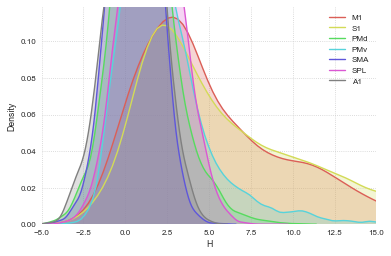

In [102]:
#The kde_roi*.csv files are generated by FigureKDE in /data/r2d4/bin/analysisScripts/
roi_medians = pd.DataFrame()
sns.set_style("white", {'axes.linewidth':0.0001, 'axes.edgecolor':'black'})
sns.set_palette("hls")
df = pd.read_csv(os.path.expanduser('~/Dropbox/r2d4/figures/Figure4/kde_roi_r_lhBA4_cropped.csv'), header=None)
roi_medians['M1']= np.nanmedian(df, axis=0)
these_vals = df.values
these_vals= these_vals[~np.isnan(these_vals)]
sns.kdeplot(these_vals, shade=True, label="M1")
df = pd.read_csv(os.path.expanduser('~/Dropbox/r2d4/figures/Figure4/kde_roi_r_lhBA123_cropped.csv'), header=None)
roi_medians['S1'] = np.nanmedian(df, axis=0)
these_vals = df.values
these_vals= these_vals[~np.isnan(these_vals)]
sns.kdeplot(these_vals, shade=True, label="S1")
df = pd.read_csv(os.path.expanduser('~/Dropbox/r2d4/figures/Figure4/kde_roi_r_lhBA_pmd.csv'), header=None)
roi_medians['PMd'] = np.nanmedian(df, axis=0)
these_vals = df.values
these_vals= these_vals[~np.isnan(these_vals)]
sns.kdeplot(these_vals, shade=True,label="PMd")
df = pd.read_csv(os.path.expanduser('~/Dropbox/r2d4/figures/Figure4/kde_roi_r_lhBA_pmv.csv'), header=None)
roi_medians['PMv'] = np.nanmedian(df, axis=0)
these_vals = df.values
these_vals= these_vals[~np.isnan(these_vals)]
sns.kdeplot(these_vals, shade=True, label="PMv")
df = pd.read_csv(os.path.expanduser('~/Dropbox/r2d4/figures/Figure4/kde_roi_r_lhBA_sma.csv'), header=None)
roi_medians['SMA'] = np.nanmedian(df, axis=0)
these_vals = df.values
these_vals= these_vals[~np.isnan(these_vals)]
sns.kdeplot(these_vals, shade=True, label="SMA")
df = pd.read_csv(os.path.expanduser('~/Dropbox/r2d4/figures/Figure4/kde_roi_r_l_sup_parietal.csv'), header=None)
roi_medians['SPL'] = np.nanmedian(df, axis=0)
these_vals = df.values
these_vals= these_vals[~np.isnan(these_vals)]
sns.kdeplot(these_vals, shade=True,  label="SPL")
df = pd.read_csv(os.path.expanduser('~/Dropbox/r2d4/figures/Figure4/kde_roi_r_A1.csv'), header=None)
roi_medians['A1']= np.nanmedian(df, axis=0)
these_vals = df.values
these_vals= these_vals[~np.isnan(these_vals)]
sns.kdeplot(these_vals, color='gray', shade=True, label="A1")
plt.grid(linestyle='dotted')

plt.legend()
plt.xlabel('H')
plt.ylabel('Density')
plt.xlim(-5,15)
plt.ylim(0,.4)
plt.savefig(os.path.expanduser('~/Dropbox/r2d4/figures/Figure4/kde_without_errorbars.svg'))


In [41]:
sns.set_palette("hls")
ax = sns.violinplot(roi_medians, inner="points")
plt.grid(linestyle='dotted')
plt.ylabel('Median')
#plt.savefig(os.path.expanduser('~/Dropbox/r2d4/figures/Figure4/kde_medians.svg')

ax.annotate('*', xy=(2, 1), xytext=(-.06, 14.6))
ax.annotate('*', xy=(2, 1), xytext=(.94, 12.5))
ax.annotate('*', xy=(2, 1), xytext=(1.94, 4))
ax.annotate('*', xy=(2, 1), xytext=(2.94, 4.3))
ax.annotate('*', xy=(2, 1), xytext=(3.94, 2.5))
ax.annotate('*', xy=(2, 1), xytext=(4.94, 4.5))
ax.annotate('ns', xy=(2, 1), xytext=(5.9, 3.4))
scipy.stats.ttest_1samp(roi_medians, 0)

NameError: name 'roi_medians' is not defined

In [115]:
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0*np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t._ppf((1+confidence)/2., n-1)
    return m, m-h, m+h

mean_confidence_interval(roi_medians)

(2.2290736111111116,
 array([ 0.91672613,  1.13932356,  1.80406572,  1.93894556,  1.93234491,
         1.83583749,  1.79284171]),
 array([ 3.54142109,  3.31882366,  2.6540815 ,  2.51920166,  2.52580231,
         2.62230974,  2.66530552]))

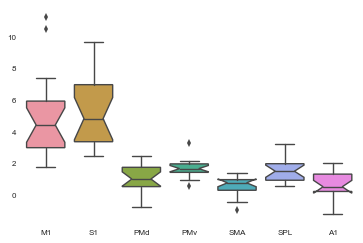

In [116]:
sns.violinplot(data=roi_medians, notch=True)

## Figure 5

/Users/plb/anaconda/envs/pydev/lib/python2.7/site-packages/seaborn/categorical.py:2567: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


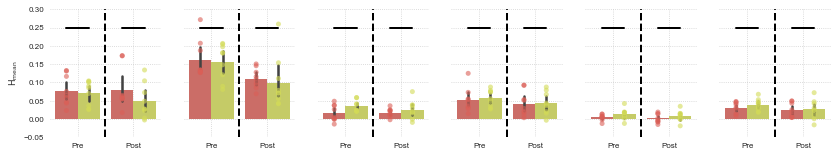

In [103]:
fig = plt.figure(figsize=(14,8))

ax1 = fig.add_subplot(361)
distances = pd.read_csv(os.path.expanduser('~/Dropbox/r2d4/figures/meanDistanceChanges.csv'), header=None)
distances.columns = ['distance','group','roi', 'pre_post']
di = {1:'T', 2:'C'}

distances = distances.replace({'group':di})
colors = {'T': "#ef8d23",'C': "#1726d3"}

#Generate group accuracy plots
current_plot_number = 361
roi_num = 1
ax1 = fig.add_subplot(current_plot_number)
this_roi = distances[distances['roi']==roi_num]
g = sns.barplot(y='distance', x='pre_post', hue='group',data=this_roi)
sns.stripplot(y='distance', x='pre_post', hue='group',data=this_roi, split=True, alpha=.6);
plt.grid(linestyle='dotted')
ax = plt.gca()
g.legend_.remove()
ax.set_ylim([-.05, .3])
g.set_xticklabels(['Pre','Post'])

plt.plot([-.2, .2], [.25, .25], 'k-', linewidth=2)
plt.plot([.8, 1.2], [.25, .25], 'k-', linewidth=2)
ax.set_xlabel('')
plt.plot([.5, .5], [-.05, .3], 'k--', linewidth=2)
ax.set_ylabel(r'$\mathrm{H_{mean}}$')


for i in arange(2,7):
    current_plot_number += 1
    roi_num +=1
    plt.grid(linestyle='dotted')
    ax1 = fig.add_subplot(current_plot_number)
    this_roi = distances[distances['roi']==roi_num]
    g = sns.barplot(y='distance', x='pre_post', hue='group',data=this_roi)
    sns.stripplot(y='distance', x='pre_post', hue='group',data=this_roi, split=True, alpha=.6);
    ax = plt.gca()
    ax.legend_.remove()
    plt.grid(linestyle='dotted')
    ax.set_xlabel('')
    ax.set_ylim([-.05, .3])
    g.set_xticklabels(['Pre','Post'])

    ax.set_yticklabels([])
    ax.set_ylabel('')
    plt.plot([-.2, .2], [.25, .25], 'k-', linewidth=2)
    plt.plot([.8, 1.2], [.25, .25], 'k-', linewidth=2)
    plt.plot([.5, .5], [-.05, .3], 'k--', linewidth=2)
    
    
plt.tight_layout
plt.savefig(os.path.expanduser('~/Dropbox/r2d4/figures/Figure5/all_h.svg'), format='svg', dpi=1000)


## Figure 6

/Users/plb/anaconda/envs/pydev/lib/python2.7/site-packages/seaborn/categorical.py:2567: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


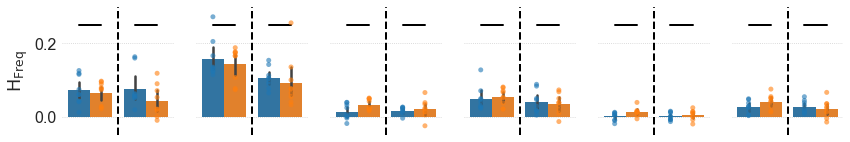

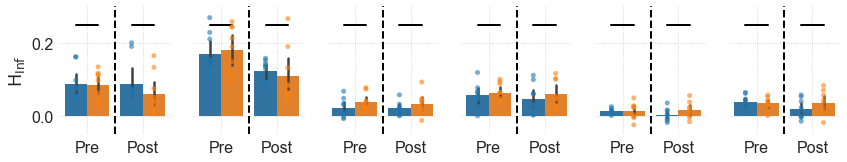

In [182]:

fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot(361)
distances = pd.read_csv(os.path.expanduser('~/Dropbox/r2d4/figures/medianSplitDistancechanges.csv'), header=None)
distances.columns = ['distance','group','roi', 'pre_post', 'bound_unbound']
di = {1:'T', 2:'C'}
distances = distances[distances.bound_unbound == 1]
distances = distances.replace({'group':di})
colors = {'T': "#FFFFFF",'C': "#1726d3"}

#Generate group accuracy plots
current_plot_number = 361
roi_num = 1
ax1 = fig.add_subplot(current_plot_number)
this_roi = distances[distances['roi']==roi_num]
g = sns.barplot(y='distance', x='pre_post', hue='group',data=this_roi)
sns.stripplot(y='distance', x='pre_post', hue='group',data=this_roi, split=True, alpha=.6);
plt.plot([-.2, .2], [.25, .25], 'k-', linewidth=2)
plt.plot([.8, 1.2], [.25, .25], 'k-', linewidth=2)

plt.grid(linestyle='dotted')
ax = plt.gca()
g.legend_.remove()
ax.set_ylim([-.05, .3])
ax.set_xticks([])
ax.set_xticklabels(['Pre','Post'])
ax.set_xlabel('')
plt.plot([.5, .5], [-0.05, .3], 'k--', linewidth=2)
ax.set_ylabel(r'$\mathrm{H_{Freq}}$')

for i in arange(2,7):
    current_plot_number += 1
    roi_num +=1
    plt.grid(linestyle='dotted')
    ax1 = fig.add_subplot(current_plot_number)
    this_roi = distances[distances['roi']==roi_num]
    g = sns.barplot(y='distance', x='pre_post', hue='group',data=this_roi)
    sns.stripplot(y='distance', x='pre_post', hue='group',data=this_roi, split=True, alpha=.6);

    plt.grid(linestyle='dotted')
    ax = plt.gca()
    ax.legend_.remove()
    plt.grid(linestyle='dotted')
    ax.set_ylabel('')
    ax.set_xticklabels(['Pre','Post'])
    plt.plot([-.2, .2], [.25, .25], 'k-', linewidth=2)
    plt.plot([.8, 1.2], [.25, .25], 'k-', linewidth=2)

    ax.set_xlabel('')
    ax.set_xticks([])
    ax.set_ylim([-.05, .3])
    ax.set_yticklabels([])
    plt.plot([.5, .5], [-.05, .3], 'k--', linewidth=2)

plt.tight_layout

plt.savefig(os.path.expanduser('~/Dropbox/r2d4/figures/Figure5/bound.svg'), format='svg', dpi=1000)


fig = plt.figure(figsize=(14,8))

ax1 = fig.add_subplot(361)
distances = pd.read_csv(os.path.expanduser('~/Dropbox/r2d4/figures/medianSplitDistancechanges.csv'), header=None)
distances.columns = ['distance','group','roi', 'pre_post', 'bound_unbound']
di = {1:'T', 2:'C'}
distances = distances[distances.bound_unbound == 2]
distances = distances.replace({'group':di})
colors = {'T': "#ef8d23",'C': "#1726d3"}

#Generate group accuracy plots
current_plot_number = 361
roi_num = 1
ax1 = fig.add_subplot(current_plot_number)
this_roi = distances[distances['roi']==roi_num]

g = sns.barplot(y='distance', x='pre_post', hue='group',data=this_roi)
sns.stripplot(y='distance', x='pre_post', hue='group',data=this_roi, split=True, alpha=.6);
plt.grid(linestyle='dotted')
ax = plt.gca()
g.legend_.remove() 

plt.plot([-.2, .2], [.25, .25], 'k-', linewidth=2)
plt.plot([.8, 1.2], [.25, .25], 'k-', linewidth=2)

ax.set_ylim([-.05, .3])
ax.set_xticklabels(['Pre','Post'])
ax.set_xlabel('')
plt.plot([.5, .5], [-0.05, .3], 'k--', linewidth=2)
ax.set_ylabel(r'$\mathrm{H_{Inf}}$')

for i in arange(2,7):
    current_plot_number += 1
    roi_num +=1
    plt.grid(linestyle='dotted')
    ax1 = fig.add_subplot(current_plot_number)
    this_roi = distances[distances['roi']==roi_num]
    g = sns.barplot(y='distance', x='pre_post', hue='group',data=this_roi)


    sns.stripplot(y='distance', x='pre_post', hue='group',data=this_roi, split=True, alpha=.6);
    plt.grid(linestyle='dotted')
    ax = plt.gca()
    ax.legend_.remove()
    plt.grid(linestyle='dotted')
    ax.set_ylabel('')
    ax.set_xticklabels(['Pre','Post'])
    ax.set_xlabel('')

    plt.plot([-.2, .2], [.25, .25], 'k-', linewidth=2)
    plt.plot([.8, 1.2], [.25, .25], 'k-', linewidth=2)

    ax.set_ylim([-.05, .3])
    ax.set_yticklabels([])
    plt.plot([.5, .5], [-0.05, .3], 'k--', linewidth=2)

plt.tight_layout
plt.savefig(os.path.expanduser('~/Dropbox/r2d4/figures/Figure5/unbound.svg'), format='svg', dpi=1000)


## Generate IPI KDEs

In [3]:
def getfirstIPIs(day, interval):
    random_trials = pd.DataFrame()
    sequence_trials = pd.DataFrame()
    random_corr_by_bin = pd.DataFrame()
    sequence_corr_by_bin = pd.DataFrame()
    allRespFiles = []
    incorrect = 0

    for root, dirs, files in os.walk(os.path.expanduser('~/Dropbox/r2d4/acfTest/sequence/')):
        pattern = '*allResp*_Day_%s.csv' % day
        for filename in fnmatch.filter(files, pattern ):
            allRespFiles.append(os.path.realpath(os.path.join(root,filename)))
 
    for file in allRespFiles:
        lag_names = ['lag' + str(i) for i in  range(1,32)]
        data_lags = pd.DataFrame(columns = lag_names)
        sum_names = ['block', 'accuracy', 'rt_all', 'rt_cor', 'sdAcc', 'sdRT', 'chunkSize']
        data_summary = pd.DataFrame(columns = (sum_names))
        skip_index = 32
        max_lags = 31
        data_out = pd.read_csv(file)
        for i in np.unique(data_out[['block']]):
                #make a plot of the response times vs trial and plot by type save with subject's id.
                data_out['trial'] = np.array(range(1,len(data_out)+1))
                sns.set_context("paper")
                block_df = data_out.loc[data_out['block']==i]
                mean_acc = block_df[['response']].mean()
                rt_all = block_df[['rt']].mean()
                block_df_cor = block_df.loc[block_df['response']==1]
                rt_cor = block_df_cor[['rt']].mean()
                std_acc = block_df[['response']].std()
                std_rt =  block_df_cor[['rt']].std()

                #do not replace skip trials
                good_trials = block_df.drop(block_df.index[:skip_index])
                good_trials = good_trials[['rt']].replace(np.nan,np.nan)
                good_trials = good_trials*1000
                gt = good_trials
                gt['rt2'] = gt.rt
                gt.rt2 = gt.rt2.shift(-1*interval)
                shift_by = -1*interval
                gt = gt[:shift_by]
                gt['IPI'] = gt.rt2 + interval*250
                gt['diff'] = np.sqrt((gt.rt2 - gt.rt)**2)

                #Drop any pairs for which either response was incorrect before dropping nans to keep index_exp

                #do not replace skip trials
                y = np.array(good_trials['rt'])
                x = np.linspace(1,y.size,y.size)
                x = np.vstack([x,np.ones(len(x))]).T
                result = sm.OLS(y, x, missing='drop').fit()
                R = result.resid   
                gt.reset_index(inplace=True)
                all_resids = pd.DataFrame()
                all_resids['rt'] = R
                all_resids['rt2'] = R
                
                all_resids.rt2 = all_resids.rt2.shift(-1*interval)
                shift_by = -1*interval
                all_resids = all_resids[:shift_by]
                all_resids['IPI'] =  gt['IPI']
                all_resids['cor'] = block_df.response
                all_resids_cor = all_resids[~all_resids.cor.isin([incorrect])]  #incorrect is 0

                all_resids_cor = all_resids
                del all_resids_cor['cor']
                all_resids_cor.dropna(axis=0, how='any') #now drop NaN - if there are any left (possible?)
                bins = np.linspace(0,1000,21)
                #inds = np.digitize(gt['IPI'], bins) not used but commenting to remember digitize
                corr_by_bin = all_resids_cor.groupby(pd.cut(all_resids_cor.IPI, bins))[['rt', 'rt2']].corr()
                
                del corr_by_bin['rt2']
                corr_by_bin = corr_by_bin.iloc[1::2]
                #Correlation cannot be identically 0 except in case where there is a single data point (which can happen if participant messes up - so drop those rows)
                corr_by_bin['rt'].replace(to_replace=[1, -1], value=np.nan, inplace=True)
                #calculate moving average plot
                mov_avg=[]
                for time_step in xrange(0,1000):
                    df = all_resids_cor[(all_resids_cor['IPI'] > time_step) & (all_resids_cor['IPI'] <= (time_step+50))]
                    mov_avg.append(df['rt'].corr(df['rt2']))
                df1 = pd.DataFrame({'sub': mov_avg})
                #gt.dropna(axis=0, how='any', inplace=True)
                #x = gt['IPI'] 
                #y = gt['diff'] 
                #z = np.polyfit(x,y, 4) 
                #p = np.poly1d(z) 
                #xp = np.linspace(0,1000,1200) 
                #plt.plot(x, y, '.') 
                #plt.xlabel('IPI') 
                #plt.ylabel('RT2-RT1') 
                #plt.ylim(0,1000) 
                #plt.plot(xp, p(xp), '--')
                #fit_ = pd.DataFrame({'sub': p(xp)})
                if i == 6:
                    random_trials = pd.concat([random_trials, good_trials.rt], ignore_index=True)
                    random_corr_by_bin = pd.concat([random_corr_by_bin,df1], axis=1)
                    #random_corr_by_bin = pd.concat([random_corr_by_bin,gt], axis=1)
                
                if i == 7:
                    sequence_trials |= pd.concat([sequence_trials, good_trials.rt], ignore_index=True)
                    sequence_corr_by_bin = pd.concat([sequence_corr_by_bin,df1], axis=1)
                    #sequence_corr_by_bin = pd.concat([sequence_corr_by_bin,gt], axis=1)
    # Floating point error caused me to add the two lines below. 
    random_corr_by_bin[(random_corr_by_bin>=.999999) | (random_corr_by_bin<=-.999999)] = np.nan 
    sequence_corr_by_bin[(sequence_corr_by_bin>=.999999) | (sequence_corr_by_bin<=-.999999)] = np.nan
    random_trials = random_trials*1000 + 250
    sequence_trials = sequence_trials*1000 + 250
    return random_trials, sequence_trials, random_corr_by_bin, sequence_corr_by_bin

In [4]:
this_interval = 1 
this_day = 24
r_t, s_t,rand_corrs,seq_corrs = getfirstIPIs(day=this_day, interval=this_interval)
rand_corrs.columns=['cont_S'+ str(x) for x in xrange(1,len(rand_corrs.columns)+1)]
seq_corrs.columns=['seq_S'+ str(x) for x in xrange(1,len(rand_corrs.columns)+1)]

/Users/plb/anaconda/envs/pydev/lib/python2.7/site-packages/ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/plb/anaconda/envs/pydev/lib/python2.7/site-packages/ipykernel_launcher.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/plb/anaconda/envs/pydev/lib/python2.7/site-packages/numpy/lib/function_base.py:3154: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/plb/anaconda/envs/pydev/lib/python2.7/site-packages/numpy/lib/function_base.py:3088: RuntimeWarning: divide by zero

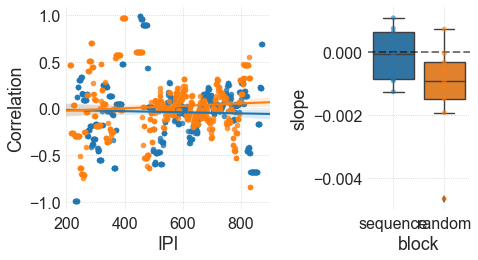

In [40]:

seq_corrs["time"] = seq_corrs.index
rand_corrs["time"] = rand_corrs.index
slopes = pd.DataFrame(columns=['slope', 'block'])

for column, index in zip (seq_corrs, xrange(1,10)) :
    mask = ~np.isnan(seq_corrs[column])
    x = seq_corrs['time']
    y = seq_corrs[column]
    x_masked = x[mask]
    y_masked = y[mask]
    slope, intercept, r_value, p_value, std_err = stats.linregress(x_masked,y_masked)
    slopes.loc[index] = [slope, 'sequence']

    
for column, index in zip (rand_corrs, xrange(1,10)) :
    mask = ~np.isnan(rand_corrs[column])
    x = rand_corrs['time']
    y = rand_corrs[column]
    x_masked = x[mask]
    y_masked = y[mask]
    slope, intercept, r_value, p_value, std_err = stats.linregress(x_masked,y_masked)
    slopes.loc[index+9] = [slope, 'random']

    
fig = plt.figure(figsize=(7, 4)) 
gs = gridspec.GridSpec(1, 2, width_ratios=[2, 1]) 
sns.set_context(context='paper', font_scale=2.0)
plt.subplot(gs[0])
sns.set_context(context='paper', font_scale=2.0)
sns.regplot(seq_corrs.time, rand_corrs.cont_S7)
sns.regplot(seq_corrs.time, seq_corrs.seq_S7)
plt.xlim([0,1000])
plt.ylabel('Correlation')
plt.xlabel('IPI')
plt.grid(linestyle='dotted')

plt.xlim(200,900)
plt.subplot(gs[1])
sns.set_context(context='paper', font_scale=2.0)
sns.boxplot(x = 'block', y= 'slope', data=slopes)
sns.stripplot(y='slope', x='block', data=slopes, split=True, alpha=.6);
plt.plot([-0.5, 4], [0, 0],'k', linewidth=2, linestyle = '--', alpha=.5)
plt.grid(linestyle='dotted')
plt.tight_layout()
plt.savefig('/Users/plb/Dropbox/r2d4/figures/final_figures/Figure3-supplemental.svg')

## Build csv for Bayes Factor Analysis


In [30]:
table = pd.read_csv('/Users/plb/Dropbox/r2d4/figures/medianSplitDistancechanges.csv', header=None)
table.columns = ['distance', 'group', 'region', 'prepost', 'bound']

for roi in xrange(1,7):
    outtable = pd.DataFrame()
    outtable['Pre'] = table[(table['region'] == 6) & (table['prepost'] == 1) & (table['bound'] == 1)].distance.values
    outtable['Post'] = table[(table['region'] == 6) & (table['prepost'] == 2) & (table['bound'] == 1)].distance.values
    outtable['Group'] = table[(table['region'] == 6) & (table['prepost'] == 2) & (table['bound'] == 1)].group.values
    outtable.to_csv(('/Users/plb/Desktop/distances/bound_distance_region_%s.csv'% roi))
    outtable = pd.DataFrame()
    outtable['Pre'] = table[(table['region'] == 6) & (table['prepost'] == 1) & (table['bound'] == 2)].distance.values
    outtable['Post'] = table[(table['region'] == 6) & (table['prepost'] == 2) & (table['bound'] == 2)].distance.values
    outtable['Group'] = table[(table['region'] == 6) & (table['prepost'] == 2) & (table['bound'] == 2)].group.values
    outtable.to_csv(('/Users/plb/Desktop/distances/unbound_distance_region_%s.csv'% roi))
    
table = pd.read_csv('/Users/plb/Dropbox/r2d4/figures/meanDistanceChanges.csv', header=None)
table.columns = ['distance', 'group', 'region', 'prepost']

for roi in xrange(1,7):
    outtable = pd.DataFrame()
    outtable['Pre'] = table[(table['region'] == 6) & (table['prepost'] == 1)].distance.values
    outtable['Post'] = table[(table['region'] == 6) & (table['prepost'] == 2)].distance.values
    outtable['Group'] = table[(table['region'] == 6) & (table['prepost'] == 2)].group.values
    outtable.to_csv(('/Users/plb/Desktop/distances/mean_distance_region_%s.csv'% roi))

## To do: Does length of autocorrelations (i.e. n_>0 lags) predict final skill.
## How is autocorrelation influenced by errors?